In [1]:
import praw
import pandas as pd
import datetime as dt
import numpy as np
import time 
import matplotlib.pyplot as plt
%matplotlib inline

reddit = praw.Reddit(client_id='THphXqxKnVtPjg', 
                     client_secret='mSD1axW8-6e-Stm5p9eJAG5qY7Q', 
                     user_agent='RGRData', 
                     username='richgetricherdata', 
                     password='ByxnbjVnq5UykPu')


In [2]:
all_data = np.genfromtxt("All_post_data.csv",delimiter=",")
all_times = np.genfromtxt("All_post_times.csv",delimiter=",")

In [3]:
import csv
idlist = []
f = open('All_post_ids.csv')
csv_f = csv.reader(f)
for row in csv_f:
    idlist.append(row[0])
idlist = idlist[1:]

In [4]:
for i in range(2000):
    try:
        posted = reddit.submission(id=idlist[i])
        all_times[i,0] = posted.created_utc
        all_data[i,0] = 1
    except:
        all_times[i,0] = all_times[i,1] - 3600

In [5]:
np.savetxt("all_data_clean_2.csv", all_data, delimiter=",", fmt='%s', header='data')
np.savetxt("all_time_clean_2.csv", all_times, delimiter=",", fmt='%s', header='times')

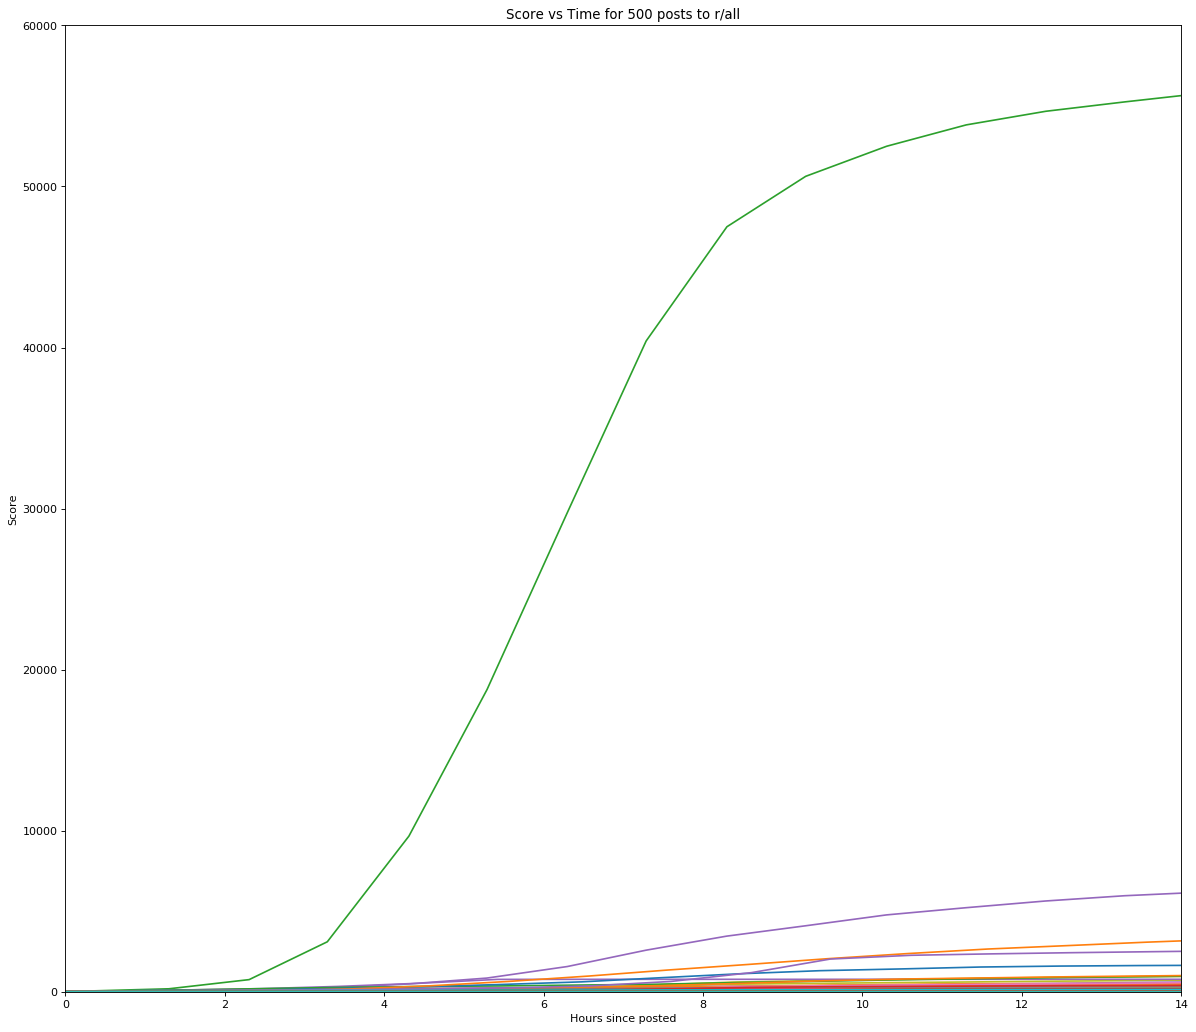

In [8]:
all_data_clean = np.genfromtxt("all_data_clean_2.csv",delimiter=",")
all_times_clean = np.genfromtxt("all_time_clean_2.csv",delimiter=",")
fig1 = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.xlim((0,14))
plt.ylim((0,60000))
plt.xlabel("Hours since posted")
plt.ylabel("Score")
plt.title("Score vs Time for 500 posts to r/all")
for i in range(len(idlist)):
    timearray = all_times_clean[i]
    dataarray = all_data_clean[i]
    start = timearray[0]
    for k in range(len(timearray)):
        timearray[k] = (timearray[k]-start) / 3600
   # print(timearray)
   # print(dataarray)
    #fixedtime = pd.to_datetime(timearray, unit='s')
    #fixedtime = fixedtime.tz_localize('UTC').tz_convert('Australia/South')
    #plt.plot_date(x=timearray, y=dataarray)
    plt.plot(timearray, dataarray)
    
#plt.legend(idlist)
plt.savefig("timeresolved.png")


[19350, 22613, 24514, 25540, 26488, 27259, 27893, 28432, 28900, 29291, 29620, 29920, 30177, 30427, 30645, 30841, 31046, 31240, 31378, 31532, 31662, 31796, 31950, 32077, 32190, 32302, 32493, 32657, 32773, 32878, 32989, 33092, 33234, 33353, 33455, 33578, 33702, 33827, 33932, 34041, 34160, 34263, 34365, 34472, 34575, 34679, 34781, 34883, 34985, 35086, 35187]


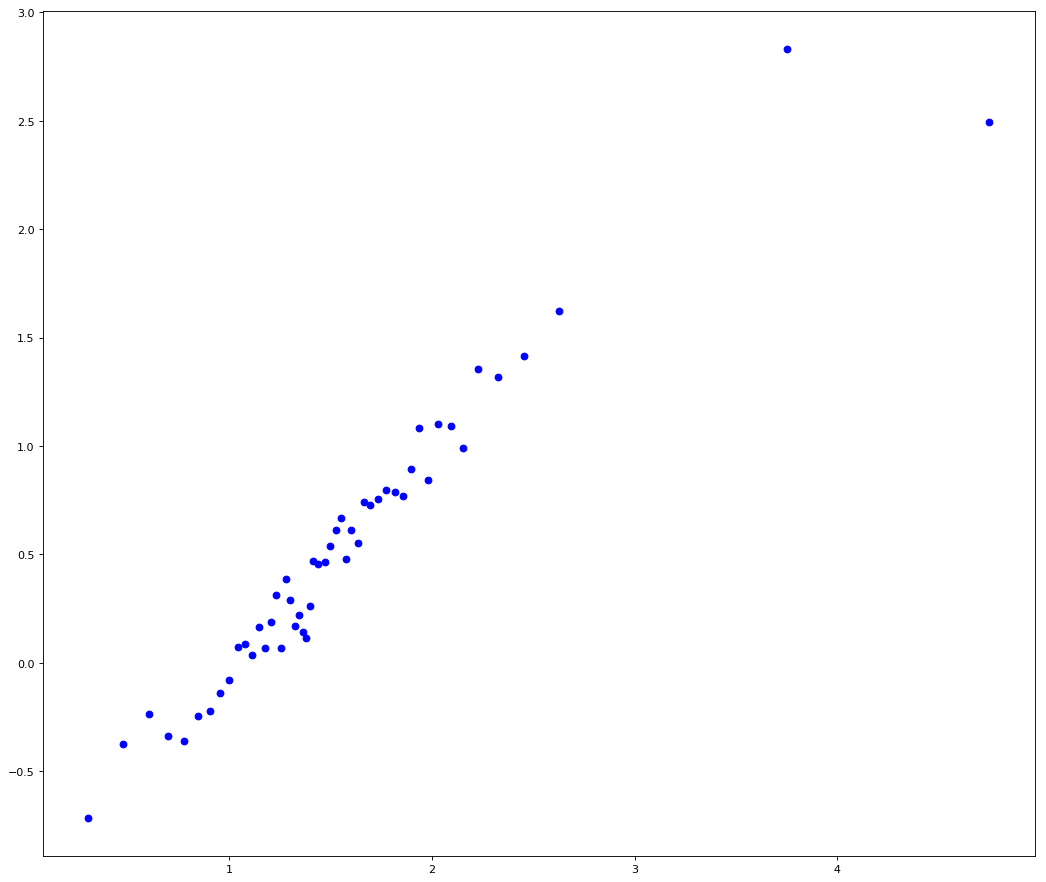

In [70]:
apd = np.genfromtxt("all_data_clean_2.csv",delimiter=",")
apt = np.genfromtxt("all_time_clean_2.csv",delimiter=",")

for i in range(1999,-1,-1):
    if np.sum(np.isnan(apd[i,:])) != 0:
        apd = np.delete(apd,i,0)
        apt = np.delete(apt,i,0)

dims = np.shape(apt)
n_ele = dims[0] * (dims[1]-1)

diff_d = np.diff(apd, axis=1)
diff_t = np.diff(apt, axis=1)
diff_th = np.divide(diff_t, 3600)
rates = np.divide(diff_d,diff_th)
rates = np.reshape(rates,n_ele)
scores = np.reshape(apd[:,0:18],n_ele)

rates = [x for _,x in sorted(zip(scores,rates))]
scores = [x for x,_ in sorted(zip(scores,rates))]
#scores, rates = (list(t) for t in zip(*sorted(zip(scores, rates))))
scores = np.array(scores)
rates = np.array(rates)


binlist = []
index = 0
for u in np.unique(scores):
    test = np.where(scores == u)
    if index + np.size(test) > 100:
        dummy = test[0]
        binlist = binlist + [dummy[-1]+1]
        index = 0 
    else:
        index = index + np.size(test)        
        
#grouping the zeros and negatives in the with ones
binlist = binlist[1:]

splitted_s = np.split(scores,binlist)
splitted_r = np.split(rates,binlist)

average_s = np.empty((1,np.size(splitted_s)))
average_s[:] = np.nan
average_r = np.empty((1,np.size(splitted_r)))
average_r[:] = np.nan
for i in range(np.size(splitted_s)):
    average_s[0,i] = np.average(splitted_s[i])
    average_r[0,i] = np.average(splitted_r[i])
    
fig1 = plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.log10(average_s[0,1:]),np.log10(average_r[0,1:]),'bo')


In [71]:
np.max([1,2,3,4,5])

5

In [75]:
a = [6,4,5,3,2]
np.where(a==np.max(a))

(array([0], dtype=int64),)

In [74]:
np.where(apd[:,-1]==np.max(apd[:,-1]))

(array([713], dtype=int64),)

In [76]:
idlist[713]

'ag5l9s'